In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import show
from datetime import datetime,date
from matplotlib.font_manager import FontProperties

In [2]:
crime_data = pd.read_csv('/Users/ameykelekar/Documents/DataAnalysisUsingPython/Data Analysis on Crime in Chicago/Chicago_crime/Crimes_-_2001_to_present.csv')

In [3]:
crime_data.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6309193,HP390075,06/11/2008 11:00:00 PM,045XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,18.0,70.0,26,1147487.0,1846446.0,2008,02/04/2016 06:33:39 AM,41.734598,-87.735264,"(41.734598385, -87.73526384)"
1,6309194,HP399120,06/16/2008 07:05:27 PM,010XX N MASSASOIT AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,29.0,25.0,06,1137833.0,1906342.0,2008,02/04/2016 06:33:39 AM,41.899141,-87.769192,"(41.899141429, -87.769191932)"
2,6309195,HP383610,06/08/2008 10:50:00 PM,050XX S CAMPBELL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,14.0,63.0,08B,1160554.0,1871189.0,2008,02/04/2016 06:33:39 AM,41.802238,-87.686710,"(41.802237609, -87.686710161)"
3,6309196,HP392398,06/13/2008 09:10:00 AM,076XX S CARPENTER ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,17.0,71.0,14,1170638.0,1854168.0,2008,02/04/2016 06:33:39 AM,41.755316,-87.650224,"(41.755315836, -87.650223819)"
4,6309197,HP398014,06/16/2008 08:50:00 AM,022XX W WARREN BLVD,0810,THEFT,OVER $500,STREET,False,False,...,2.0,28.0,06,1161454.0,1900313.0,2008,02/04/2016 06:33:39 AM,41.882138,-87.682600,"(41.88213835, -87.682600206)"
5,6309198,HP391041,06/12/2008 03:09:35 PM,061XX S WESTERN AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,15.0,66.0,06,1161426.0,1863839.0,2008,02/04/2016 06:33:39 AM,41.782050,-87.683716,"(41.782050198, -87.683715843)"
6,6309199,HP398267,06/16/2008 11:50:19 AM,052XX W CHICAGO AVE,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False,...,37.0,25.0,26,1141074.0,1904824.0,2008,02/04/2016 06:33:39 AM,41.894917,-87.757325,"(41.894916758, -87.757325092)"
7,6309200,HP392400,06/13/2008 09:10:00 AM,076XX S CARPENTER ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,17.0,71.0,14,1170638.0,1854155.0,2008,02/04/2016 06:33:39 AM,41.755280,-87.650224,"(41.755280162, -87.650224197)"
8,6309201,HP390286,06/11/2008 02:24:00 AM,056XX S SAWYER AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,14.0,63.0,26,1155675.0,1867099.0,2008,02/04/2016 06:33:39 AM,41.791113,-87.704713,"(41.791113403, -87.704713311)"
9,6309202,HP394354,06/14/2008 04:00:00 AM,010XX W BELMONT AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,44.0,6.0,08B,1168609.0,1921413.0,2008,02/04/2016 06:33:39 AM,41.939886,-87.655715,"(41.939886113, -87.655715063)"


In [4]:
datetime.strptime(crime_data['Date'][0],'%m/%d/%Y %I:%M:%S %p').date().strftime('%B')

'June'

In [5]:
crime_data['Month'] = crime_data['Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p').date().strftime('%B'))

In [6]:
new_df = crime_data.groupby(['Primary Type','Year','Month']).size().reset_index(name="Crimes Count")

In [7]:
new_df1 = new_df.loc[new_df['Primary Type'].isin(['HOMICIDE','PROSTITUTION','ASSAULT','NARCOTICS','MOTOR VEHICLE THEFT'])]

In [8]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mapping = {month: i for i, month in enumerate(months)}
key = new_df1['Month'].map(mapping)

In [9]:
new_df2 = new_df1.iloc[key.argsort()]

In [10]:
new_df2.head()

,Primary Type,Year,Month,Crimes Count
3899,PROSTITUTION,2010,January,278
3911,PROSTITUTION,2011,January,242
3062,NARCOTICS,2013,January,2938
339,ASSAULT,2013,January,1396
1862,HOMICIDE,2010,January,22


In [38]:
def create_graph(primary_type_list):
    for primary_type in primary_type_list:
        sns.set_style('white')
        #sns.set(font_scale=1.2)
        g = sns.factorplot(x="Month", y="Crimes Count", hue="Year", data= new_df2[new_df2['Primary Type'] == primary_type], size=8, aspect=2)
        g.set_xticklabels(rotation=90)
        g.fig.suptitle('Seasonality selected crimes: Jan 2001 - present, Primary Type = %s' %(primary_type),fontsize=15)
        g.set_xlabels(fontsize=15)
        g.set_ylabels(fontsize=15) 
        plt.axvspan(3.5, 7.5, color='y', alpha=0.1, label='Summer')

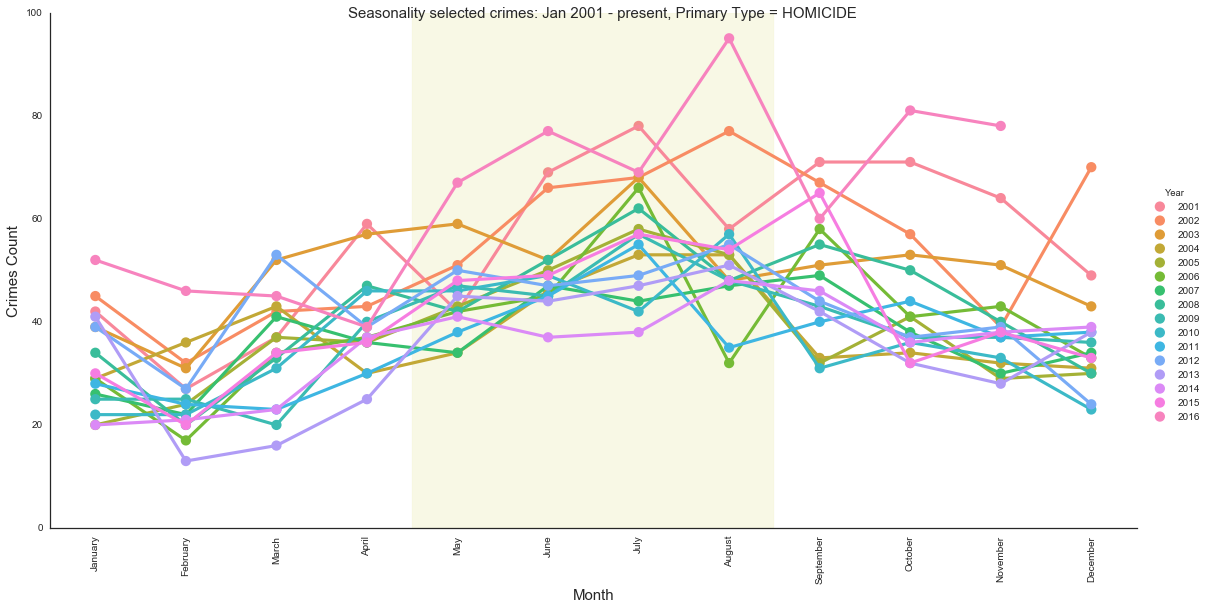

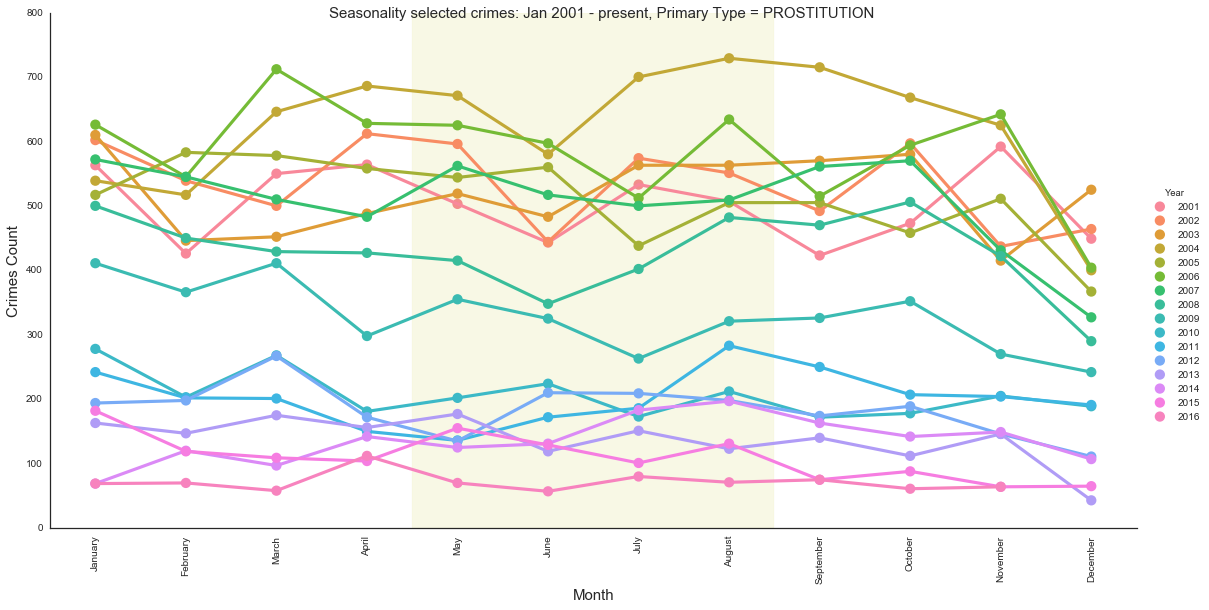

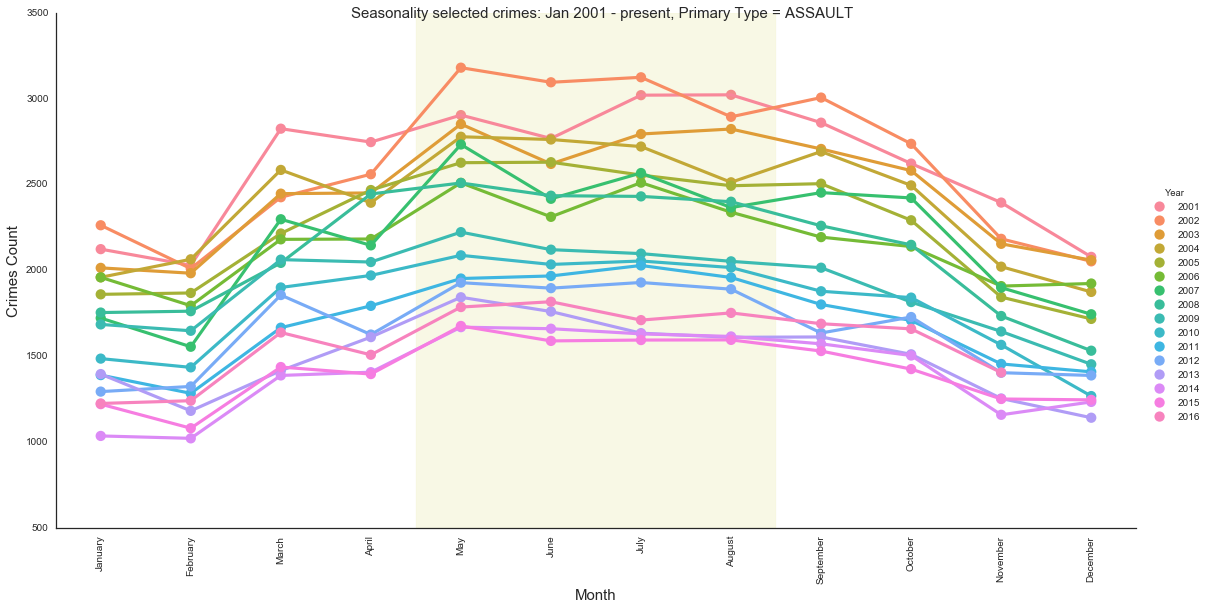

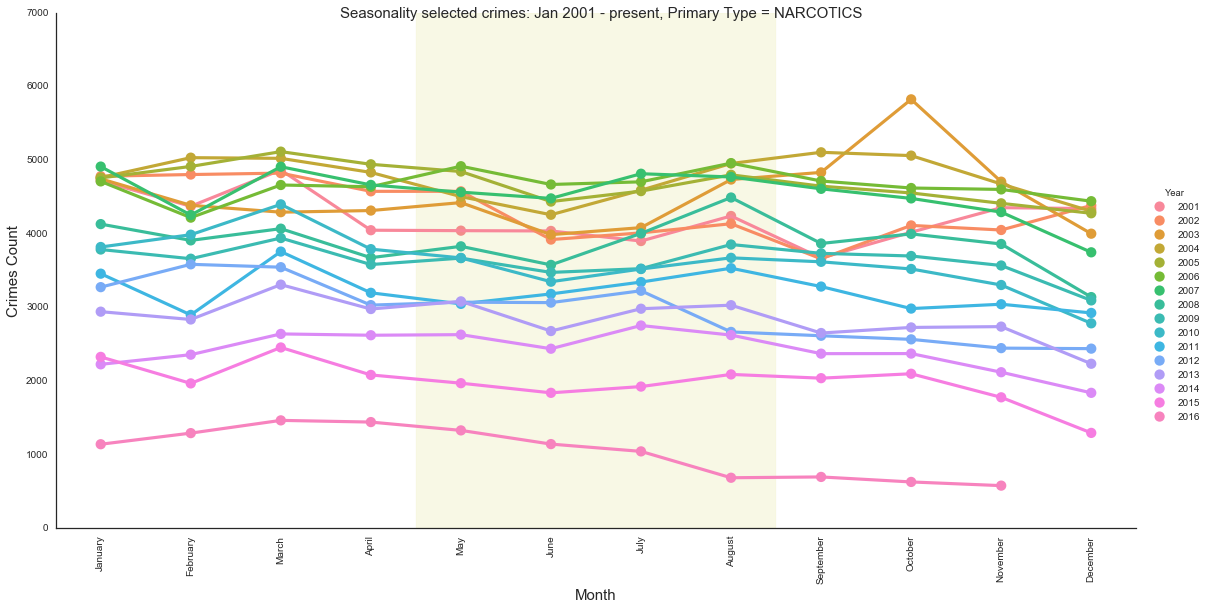

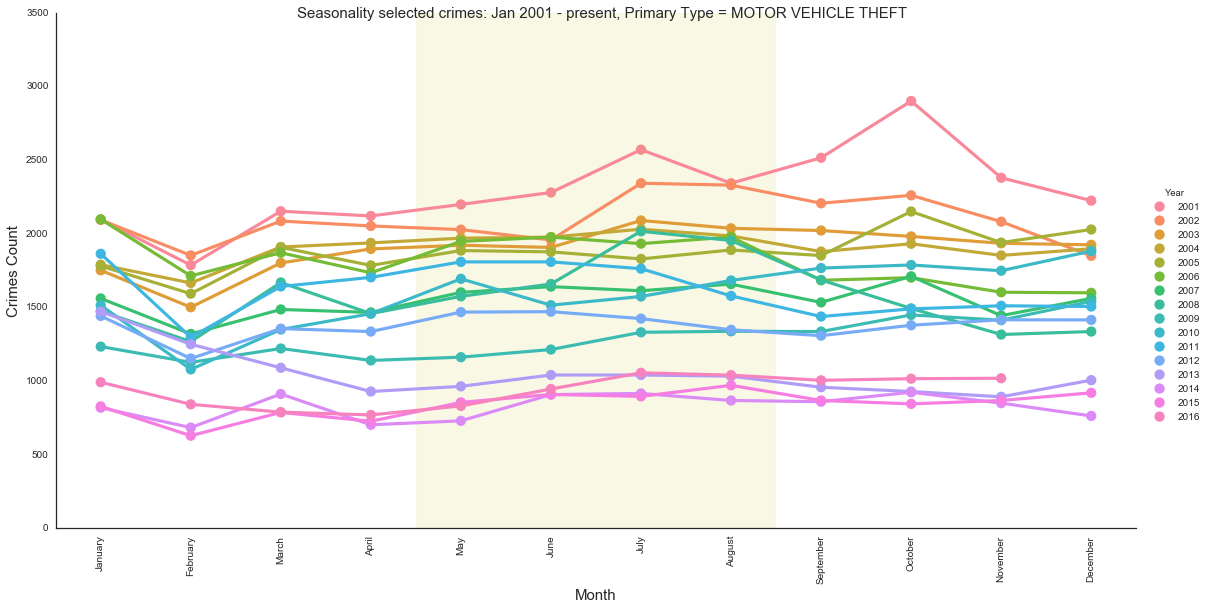

In [39]:
create_graph(['HOMICIDE','PROSTITUTION','ASSAULT','NARCOTICS','MOTOR VEHICLE THEFT'])